<a href="https://colab.research.google.com/github/Kirans1ngh/Machine-Learning-practice/blob/main/Data_Preprocessing/Feature_Scaling_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset                   | Scaler          | Min After  | Max After 
----------------------------------------------------------------------
Breast Cancer             | StandardScaler  |      -2.23 |       4.65
Breast Cancer             | MinMaxScaler    |       0.00 |       1.00
Breast Cancer             | RobustScaler    |      -1.62 |       3.63
Breast Cancer             | MaxAbsScaler    |       0.25 |       1.00
Diabetes                  | StandardScaler  |      -2.25 |       2.33
Diabetes                  | MinMaxScaler    |       0.00 |       1.00
Diabetes                  | RobustScaler    |      -1.49 |       1.40
Diabetes                  | MaxAbsScaler    |      -0.97 |       1.00
House Pricing             | StandardScaler  |      -0.77 |       1.97
House Pricing             | MinMaxScaler    |       0.00 |       1.00
House Pricing             | RobustScaler    |      -1.00 |       9.00
House Pricing             | MaxAbsScaler    |       0.15 |       1.00
Customer Segmentati

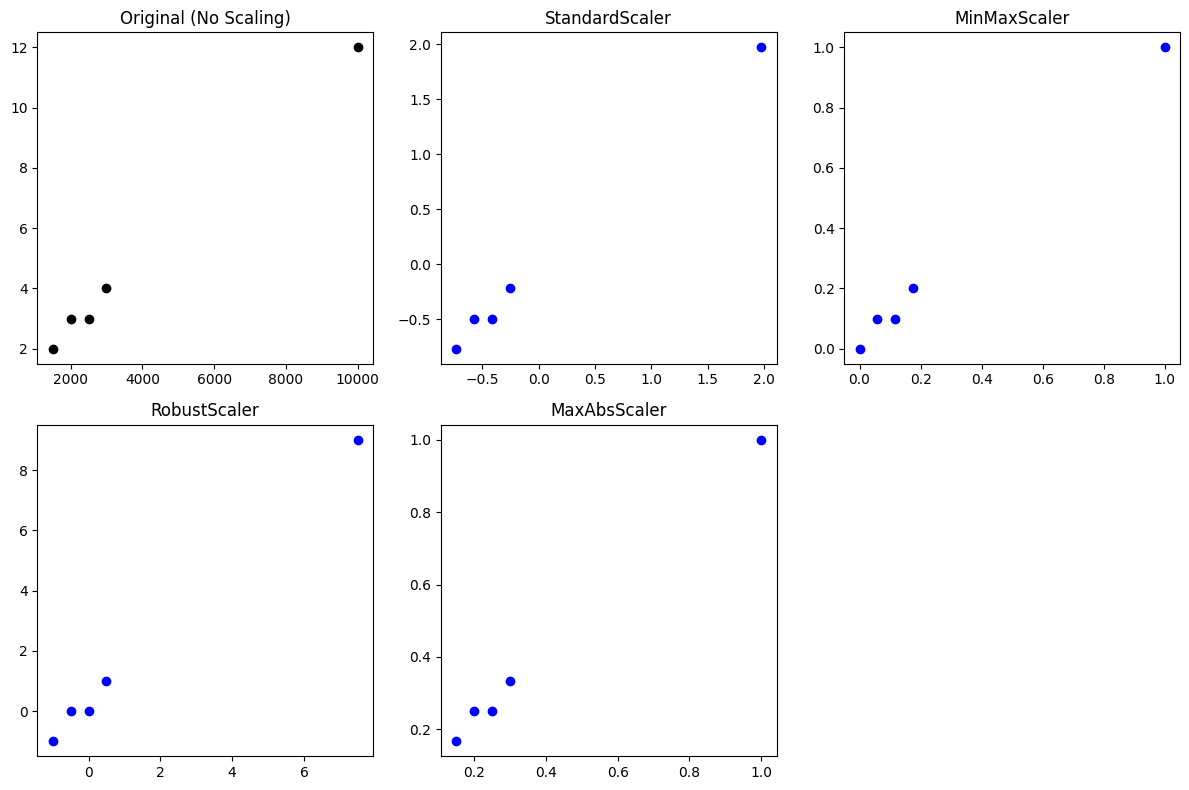

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    MaxAbsScaler
)
from sklearn.datasets import load_breast_cancer, load_diabetes

def get_datasets():
    """Returns a dictionary of datasets for scaling."""
    # 1. Breast Cancer (Numerical, different scales)
    cancer = load_breast_cancer()
    df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)

    # 2. Diabetes (Numerical)
    diabetes = load_diabetes()
    df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

    # 3. House Pricing (Mock: square feet vs rooms)
    df_house = pd.DataFrame({
        'sqft': [1500, 2000, 2500, 3000, 10000], # Note outlier 10000
        'rooms': [2, 3, 3, 4, 12]
    })

    # 4. Customer Segmentation (Mock: Income vs Age)
    df_customer = pd.DataFrame({
        'income': [40000, 50000, 60000, 200000, 55000],
        'age': [25, 30, 35, 40, 28]
    })

    # 5. Car Evaluation (Mock: Engine Size vs Fuel Efficiency)
    df_car = pd.DataFrame({
        'engine_cc': [1000, 1500, 2000, 3000, 5000],
        'kmpl': [20, 18, 15, 12, 8]
    })

    return {
        "Breast Cancer": df_cancer.iloc[:, :2], # Subset for visualization
        "Diabetes": df_diabetes.iloc[:, :2],
        "House Pricing": df_house,
        "Customer Segmentation": df_customer,
        "Car Evaluation": df_car
    }

# Scalers to apply
scalers = {
    "StandardScaler": StandardScaler(), # Mean=0, Var=1
    "MinMaxScaler": MinMaxScaler(),     # Range [0, 1]
    "RobustScaler": RobustScaler(),     # Uses Median/IQR (Outlier resistant)
    "MaxAbsScaler": MaxAbsScaler()      # Scales by max absolute value
}

datasets = get_datasets()

# 6. PROCESSING AND TEXT OUTPUT
print(f"{'Dataset':<25} | {'Scaler':<15} | {'Min After':<10} | {'Max After':<10}")
print("-" * 70)

for d_name, df in datasets.items():
    for s_name, scaler in scalers.items():
        scaled_data = scaler.fit_transform(df)

        # Log basic stats for assignment output
        s_min = scaled_data.min()
        s_max = scaled_data.max()
        print(f"{d_name:<25} | {s_name:<15} | {s_min:>10.2f} | {s_max:>10.2f}")

# 7. COMPARATIVE ANALYSIS (TEXT)
"""
ANALYSIS SUMMARY:
- StandardScaler: Best when data follows a Gaussian (Normal) distribution.
  It centers data around 0 but does not bound it to a specific range.

- MinMaxScaler: Shrinks data into [0, 1].
  Excellent for Neural Networks but highly sensitive to outliers.

- RobustScaler: Uses the Interquartile Range (IQR).
  Best for House Pricing or Customer data where extreme outliers (e.g., $1M house)
  would 'squash' the rest of the data in MinMaxScaler.

- MaxAbsScaler: Scales data to [-1, 1] based on the absolute maximum.
  Commonly used for sparse data or data already centered at zero.
"""

# 8. VISUALIZATION EXAMPLE (House Pricing)
df_sample = datasets["House Pricing"]
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.scatter(df_sample.iloc[:,0], df_sample.iloc[:,1], color='black')
plt.title("Original (No Scaling)")

for i, (name, scaler) in enumerate(scalers.items(), 2):
    plt.subplot(2, 3, i)
    data = scaler.fit_transform(df_sample)
    plt.scatter(data[:,0], data[:,1], color='blue')
    plt.title(name)

plt.tight_layout()
plt.show()